### Selected protein targets are RBD-S (PDB ID:6LXT), PD-ACE2 (PDB ID: 6VW1), and SARS-CoV-2 protease (PDB ID:6LU7)

In [2]:
import pickle as pkl

import lxml
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import imdb


from tqdm.notebook import tqdm

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, Conv1D, Flatten, MaxPooling1D,\
                        AveragePooling1D, Concatenate, LeakyReLU, Embedding,\
                        GlobalMaxPooling1D,GlobalAveragePooling1D,GaussianNoise,BatchNormalization,Add
from tensorflow.keras.initializers import glorot_uniform
#from tensorflow.keras.utils.vis_utils import plot_model

import importlib
importlib.reload(tensorflow)

<module 'tensorflow' from '/miniconda/lib/python3.6/site-packages/tensorflow/__init__.py'>

In [3]:
tqdm.pandas()

In [4]:
import tensorflow as tf
with tf.Session() as sess:
    devices = sess.list_devices()

In [5]:
import sys

In [6]:
!{sys.executable} -m list

/miniconda/bin/python: No module named list


# Load NDM

In [7]:
ndm_df = pd.read_pickle('NDM_Master_FingerPrints_InChi.pkl')

In [8]:
ndm_df = ndm_df.drop(columns=['fingerprint_r2','fingerprint_vector','fingerprint_r2_vector','glove_vector'])

In [9]:
ndm_df

,name,InChIKey,First Block,Metabolon_RP,UCD_GC,UCD_HIL,UCD_LIP,UCD_PFP,phenolexplorer_id,dfc_id,...,complexity,xlogp,heavycnt,hbonddonor,hbondacc,rotbonds,dois,InChiKey,cid,fingerprint
0,"1,5,8-Trihydroxy-3-methyl-2-prenylxanthone",AAANZTDKTFGJLZ-UHFFFAOYSA-N,AAANZTDKTFGJLZ,NaN,NaN,NaN,NaN,NaN,NaN,HHG46-P:HHG14-E,...,528.0,NaN,25.0,3.0,6.0,3.0,10.1007/978-94-007-1764-0_15,AAANZTDKTFGJLZ-UHFFFAOYSA-N,14162674.0,2246728737 3545365497 2246699815 176403689 224...
1,"2,4-Dimethylfuran",AABTWRKUKUPMJG-UHFFFAOYSA-N,AABTWRKUKUPMJG,NaN,NaN,NaN,NaN,NaN,NaN,FWS22-S:FWS22-S,...,61.2,NaN,7.0,0.0,1.0,0.0,10.1007/978-3-642-41473-2_4|10.1007/978-94-007...,AABTWRKUKUPMJG-UHFFFAOYSA-N,19462.0,2246728737 422715066 3217380708 3661262542 321...
2,Schidigerasaponin E1,AADIIQJBIMAADJ-UHFFFAOYSA-N,AADIIQJBIMAADJ,NaN,NaN,NaN,NaN,NaN,NaN,GMN25-P:JYJ15-F,...,1610.0,NaN,62.0,9.0,18.0,8.0,NaN,AADIIQJBIMAADJ-UHFFFAOYSA-N,73798945.0,2246728737 1858577693 2976033787 1228815484 29...
3,sphingomyelin (d18:1/20:0),AADLTHQNYQJHQV-SVLGDMRNSA-N,AADLTHQNYQJHQV,100006290.0,NaN,NaN,L489,NaN,NaN,NaN,...,857.0,NaN,52.0,2.0,6.0,40.0,10.1038/s41598-018-28477-9,AADLTHQNYQJHQV-SVLGDMRNSA-N,44260124.0,2246728737 3542456614 2245384272 1173125914 22...
4,Matairesinoside,AAGCATAPYOEULE-LHHMAMHXSA-N,AAGCATAPYOEULE,NaN,NaN,NaN,NaN,NaN,NaN,JRV93-M:JJJ08-E,...,737.0,NaN,37.0,5.0,11.0,9.0,10.1016/j.bmcl.2013.08.065|10.1016/j.fitote.20...,AAGCATAPYOEULE-LHHMAMHXSA-N,486612.0,2246728737 3975275337 864674487 2076190208 321...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19598,"2,5-Dimethyl-3-(methyldithio)furan",ZZXDUGZYDILQMO-UHFFFAOYSA-N,ZZXDUGZYDILQMO,NaN,NaN,NaN,NaN,NaN,NaN,MFW29-D:MFW29-D,...,108.0,NaN,10.0,0.0,3.0,2.0,10.1007/978-3-319-26932-0_10,ZZXDUGZYDILQMO-UHFFFAOYSA-N,20313888.0,2246728737 422715066 3217380708 3661262542 321...
19599,Muricadienin,ZZXWNKPYSIVFNM-XUWLZAGCSA-N,ZZXWNKPYSIVFNM,NaN,NaN,NaN,NaN,NaN,NaN,FFY87-E:FOW95-G,...,600.0,NaN,37.0,0.0,2.0,27.0,10.1021/acs.jnatprod.6b00335|10.1021/ol502849y...,ZZXWNKPYSIVFNM-XUWLZAGCSA-N,131751334.0,2246728737 3542456614 2245384272 1173125914 22...
19600,L-Lysopine,ZZYYVZYAZCMNPG-UHFFFAOYSA-N,ZZYYVZYAZCMNPG,NaN,NaN,NaN,NaN,NaN,NaN,HGR03-W:GZD90-U,...,220.0,NaN,15.0,4.0,6.0,8.0,NaN,ZZYYVZYAZCMNPG-UHFFFAOYSA-N,3325403.0,2246728737 3537119515 2245273601 2637439965 22...
19601,Sarcodon scabrosus Depsipeptide,ZZZCVVSDKFDQJU-UHFFFAOYSA-N,ZZZCVVSDKFDQJU,NaN,NaN,NaN,NaN,NaN,NaN,NRT85-T:NRT85-T,...,769.0,NaN,34.0,4.0,8.0,5.0,NaN,ZZZCVVSDKFDQJU-UHFFFAOYSA-N,131753140.0,2246728737 3542456614 2245384272 1506563592 22...


In [10]:
corona_gene_df = pd.read_pickle('data/corona_gene_aa_seq.pkl')

In [11]:
corona_gene_df

,hgnc_symbol,gene_sequence,amino_acid_sequence
0,AP3B1,ACTGCGCATGCGCAGGGGGTGGACTGCCAGGTCGGCTCAGGGAGCC...,TAHAQGVDCQVGSGSRDESGSACARSSVRELVLFRALWTGTFWREP...
1,BRD4,GACGTCAGTGCGCTGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCTG...,DVSALAAAAAAAAAAGLFVLVSRSRGAEAVAAAAAAAAAGGARGRA...
2,BRD2,GGCCAAATCGTCTTCAGAGTCCTCCAGTGAGGAAAGTAGCAGTGAG...,GQIVFRVLQ*GK*Q*ELL*GRGGGR*GRGGRRE*KLRLRGRKGSSL...
3,CWC27,AGCGGTGCTCGGGTCCGGTAACAACATGGCGGCGTCCGTGAGGGGC...,SGARVR*QHGGVREGLLWAGVVFGVPVLRDIDKLKLSCTTGLKEEC...
4,ZC3H18,AGGACTACCGTCGCGGCCTGATGACGTCGCACAATGGCCGGCCCCC...,RTTVAA**RRTMAGPRG*WSPFVPPVSSLEPEPVKSGRAKGRLLHA...
...,...,...,...
325,BCS1L,AAGGAGGACGCTGAGCCGTCAAGATTAAGAACCTTCACCTGCGGGA...,KEDAEPSRLRTFTCGRAG*GRRQVGTREEIRLSSGQEG*GRERTD*...
326,NDUFAF1,GGAAGGGAAAAGCAGATGGACCTATACGGGTAAAGTGGCTTCTGGG...,GREKQMDLYG*SGFWAEGTL*ARGGKRRQAGGWCVPGVGRRQSPGT...
327,TMED5,GTCAGGGGGAGAGGCGGGCGGCGCTCACGCCTGGCCTGAGGGGGCC...,VRGRGGRRSRLA*GGRD*GGCGIGLLAPPRVPTLWRTALLFRRECS...
328,NDUFB9,GCCCTTCCGGCTGGCCCCGCTCAGTCACCCGCAGCAGGCGTGCAGT...,ALPAGPAQSPAAGVQFPGSPRGRGRSAP*WRSWRRDPT*PISKRCC...


In [12]:
human_330_samples_gene = pd.DataFrame()

human_330_samples_gene['hgnc_symbol'] = corona_gene_df['hgnc_symbol'] 
human_330_samples_gene['target_gene_code'] = corona_gene_df['gene_sequence'] 

#negative_samples_gene = negative_samples_gene.drop_duplicates(subset=['gene_id'], keep=False)

human_330_samples_gene.to_pickle('human_330_samples_gene.pkl')

In [13]:
gene_seq_list = corona_gene_df['gene_sequence'].tolist()
gene_seq_len_list = []

for gene_name in gene_seq_list:
    gene_seq_len_list.append(len(gene_name))
    
gene_seq_len_list

[294231,
 97027,
 3660,
 249821,
 61586,
 42101,
 32077,
 4566,
 27026,
 63229,
 96120,
 31318,
 16828,
 65024,
 9289,
 45905,
 13121,
 224418,
 35114,
 99960,
 13347,
 85682,
 103195,
 26678,
 36153,
 6762,
 115952,
 494686,
 33708,
 20246,
 140435,
 11414,
 70707,
 39092,
 34460,
 60393,
 8476,
 36994,
 40200,
 8311,
 41741,
 15975,
 104763,
 15723,
 19845,
 36299,
 27606,
 81744,
 28899,
 46224,
 16929,
 20585,
 33436,
 303078,
 21079,
 332046,
 43670,
 27514,
 106096,
 71505,
 3557,
 118433,
 9403,
 9170,
 177615,
 75739,
 6685,
 26414,
 282438,
 20071,
 51197,
 51332,
 8720,
 3920,
 126562,
 127257,
 62514,
 115423,
 128416,
 46673,
 124792,
 54404,
 380659,
 18397,
 246649,
 17970,
 191530,
 11760,
 121629,
 103278,
 26397,
 117107,
 432418,
 61377,
 105865,
 50387,
 10198,
 60165,
 20167,
 86569,
 28545,
 160103,
 240106,
 84491,
 30639,
 102748,
 505425,
 60225,
 91939,
 111359,
 556597,
 354449,
 136362,
 12984,
 174393,
 191302,
 169807,
 11705,
 77926,
 12243,
 64117,
 50023

Text(0,0.5,'Number of Genes')

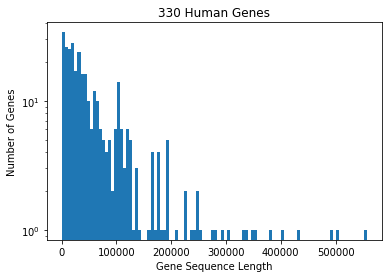

In [14]:
plt.hist(gene_seq_len_list, bins = 100, log = True)
plt.title('330 Human Genes')
plt.xlabel('Gene Sequence Length')
plt.ylabel('Number of Genes')

# Preparing data

In [15]:
corona_gene_df['target_gene_code'] = corona_gene_df['gene_sequence'] #.apply(lambda x: ''.join(list(x.split('\n')[1:])))
#drugbank['target_amino_code'] = drugbank['target_amino'].apply(lambda x: ''.join(list(x.split('\n')[1:])))

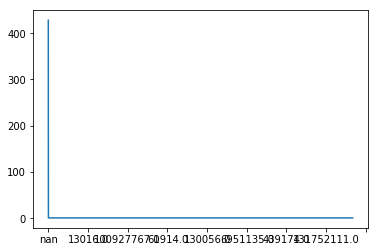

In [16]:
ndm_df['cid'].value_counts().plot()

In [17]:
ndm_df = ndm_df[['cid', 'fingerprint']].drop_duplicates('cid')

#### Preprocessing fingerprints to feed to CNN

In [18]:
label_encoder = LabelEncoder()
label_encoder = pd.read_pickle('data/gene_encoder.pkl')
#label_encoder.fit(list(corona_gene_df['target_gene_code'].iloc[0]))

#with open('data/gene_encoder.pkl', 'wb') as f:
#    pkl.dump(label_encoder, f)
    
gene_chars = set(list(corona_gene_df['target_gene_code'].iloc[0]))

corona_gene_df['target_gene_encoded'] = corona_gene_df['target_gene_code'].progress_apply(\
                                   lambda x: label_encoder.transform([i for i in list(x) if i in gene_chars]))
ndm_df['drug_fingerprint_encoded'] = ndm_df['fingerprint'].progress_apply(lambda x: [int(i) for i in x.replace(' ', '')])

#### Calculate length mismatches and pad

In [19]:
corona_gene_df['target_gene_encoded_len'] = corona_gene_df['target_gene_encoded']\
                                    .apply(lambda x: len(x))
ndm_df['drug_fingerprint_encoded_len'] = ndm_df['drug_fingerprint_encoded']\
                                    .apply(lambda x: len(x))

In [20]:
max_target_gene_encoded_len = max(corona_gene_df['target_gene_encoded_len'])
max_drug_fingerprint_encoded_len = max(ndm_df['drug_fingerprint_encoded_len'])

In [21]:
corona_gene_df['target_gene_encoded_mismatch'] = max_target_gene_encoded_len - corona_gene_df['target_gene_encoded_len']

In [22]:
ndm_df['drug_fingerprint_encoded_mismatch'] = max_drug_fingerprint_encoded_len - ndm_df['drug_fingerprint_encoded_len'] 

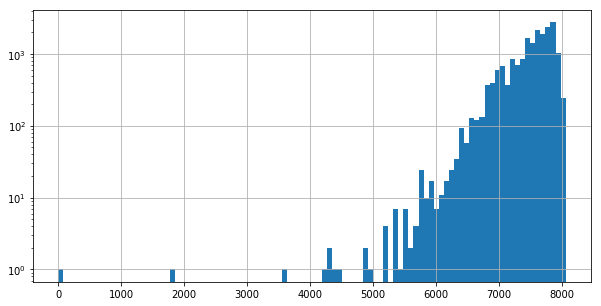

In [23]:
ndm_df['drug_fingerprint_encoded_mismatch'].hist(bins = 100, figsize = (10, 5), log = True)

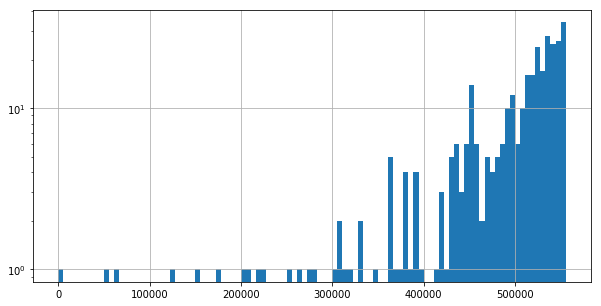

In [24]:
corona_gene_df['target_gene_encoded_mismatch'].hist(bins = 100, figsize = (10, 5), log = True)

In [25]:
max_target_gene_encoded_len

556597

In [26]:
corona_gene_df['target_gene_encoded'][0].shape

(294231,)

In [27]:
corona_gene_df['target_gene_encoded_padded'] = corona_gene_df[['target_gene_encoded','target_gene_encoded_mismatch']]\
                                         .progress_apply(lambda x: ['-1' for i in range(int(x['target_gene_encoded_mismatch']/2))] +   
                                                        list(x['target_gene_encoded']) +
                                                        ['-1' for i in range (int(x['target_gene_encoded_mismatch']/2))]
                                                        , axis = 1)
corona_gene_df['target_gene_encoded_padded'] = corona_gene_df['target_gene_encoded_padded'].apply(lambda x: x + ['-1'] if len(x) < max_target_gene_encoded_len else x)

In [28]:
ndm_df['drug_fingerprint_encoded_padded'] = ndm_df[['drug_fingerprint_encoded','drug_fingerprint_encoded_mismatch']]\
                                         .progress_apply(lambda x: ['-1' for i in range(int(x['drug_fingerprint_encoded_mismatch']/2))] +   
                                                        list(x['drug_fingerprint_encoded']) +
                                                        ['-1' for i in range (int(x['drug_fingerprint_encoded_mismatch']/2))]
                                                        , axis = 1)

ndm_df['drug_fingerprint_encoded_padded'] = ndm_df['drug_fingerprint_encoded_padded'].apply(lambda x: x + ['-1'] if len(x) < max_drug_fingerprint_encoded_len else x)

In [25]:
ndm_df.to_csv('data/intermediate/ndm_preprocessed.csv')
corona_gene_df.to_csv('data/intermediate/330_corona_genes_preprocessed.csv')

In [26]:
ndm_df

,cid,fingerprint,drug_fingerprint_encoded,drug_fingerprint_encoded_len,drug_fingerprint_encoded_mismatch,drug_fingerprint_encoded_padded
0,14162674.0,2246728737 3545365497 2246699815 176403689 224...,"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 5, 3, ...",479,7593,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
1,19462.0,2246728737 422715066 3217380708 3661262542 321...,"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 4, 2, 2, 7, 1, ...",137,7935,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
2,73798945.0,2246728737 1858577693 2976033787 1228815484 29...,"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 1, 8, 5, 8, 5, ...",1203,6869,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
3,44260124.0,2246728737 3542456614 2245384272 1173125914 22...,"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 2, 4, ...",1026,7046,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
4,486612.0,2246728737 3975275337 864674487 2076190208 321...,"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 9, 7, 5, 2, ...",714,7358,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
...,...,...,...,...,...,...
19598,20313888.0,2246728737 422715066 3217380708 3661262542 321...,"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 4, 2, 2, 7, 1, ...",196,7876,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
19599,131751334.0,2246728737 3542456614 2245384272 1173125914 22...,"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 2, 4, ...",730,7342,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
19600,3325403.0,2246728737 3537119515 2245273601 2637439965 22...,"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 3, 7, 1, ...",293,7779,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
19601,131753140.0,2246728737 3542456614 2245384272 1506563592 22...,"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 2, 4, ...",660,7412,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."


In [27]:
corona_gene_df

,hgnc_symbol,gene_sequence,amino_acid_sequence,target_gene_code,target_gene_encoded,target_gene_encoded_len,target_gene_encoded_mismatch,target_gene_encoded_padded
0,AP3B1,ACTGCGCATGCGCAGGGGGTGGACTGCCAGGTCGGCTCAGGGAGCC...,TAHAQGVDCQVGSGSRDESGSACARSSVRELVLFRALWTGTFWREP...,ACTGCGCATGCGCAGGGGGTGGACTGCCAGGTCGGCTCAGGGAGCC...,"[0, 1, 3, 2, 1, 2, 1, 0, 3, 2, 1, 2, 1, 0, 2, ...",294231,262366,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
1,BRD4,GACGTCAGTGCGCTGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCTG...,DVSALAAAAAAAAAAGLFVLVSRSRGAEAVAAAAAAAAAGGARGRA...,GACGTCAGTGCGCTGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCTG...,"[2, 0, 1, 2, 3, 1, 0, 2, 3, 2, 1, 2, 1, 3, 2, ...",97027,459570,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
2,BRD2,GGCCAAATCGTCTTCAGAGTCCTCCAGTGAGGAAAGTAGCAGTGAG...,GQIVFRVLQ*GK*Q*ELL*GRGGGR*GRGGRRE*KLRLRGRKGSSL...,GGCCAAATCGTCTTCAGAGTCCTCCAGTGAGGAAAGTAGCAGTGAG...,"[2, 2, 1, 1, 0, 0, 0, 3, 1, 2, 3, 1, 3, 3, 1, ...",3660,552937,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
3,CWC27,AGCGGTGCTCGGGTCCGGTAACAACATGGCGGCGTCCGTGAGGGGC...,SGARVR*QHGGVREGLLWAGVVFGVPVLRDIDKLKLSCTTGLKEEC...,AGCGGTGCTCGGGTCCGGTAACAACATGGCGGCGTCCGTGAGGGGC...,"[0, 2, 1, 2, 2, 3, 2, 1, 3, 1, 2, 2, 2, 3, 1, ...",249821,306776,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
4,ZC3H18,AGGACTACCGTCGCGGCCTGATGACGTCGCACAATGGCCGGCCCCC...,RTTVAA**RRTMAGPRG*WSPFVPPVSSLEPEPVKSGRAKGRLLHA...,AGGACTACCGTCGCGGCCTGATGACGTCGCACAATGGCCGGCCCCC...,"[0, 2, 2, 0, 1, 3, 0, 1, 1, 2, 3, 1, 2, 1, 2, ...",61586,495011,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
...,...,...,...,...,...,...,...,...
325,BCS1L,AAGGAGGACGCTGAGCCGTCAAGATTAAGAACCTTCACCTGCGGGA...,KEDAEPSRLRTFTCGRAG*GRRQVGTREEIRLSSGQEG*GRERTD*...,AAGGAGGACGCTGAGCCGTCAAGATTAAGAACCTTCACCTGCGGGA...,"[0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 1, 3, 2, 0, 2, ...",4680,551917,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
326,NDUFAF1,GGAAGGGAAAAGCAGATGGACCTATACGGGTAAAGTGGCTTCTGGG...,GREKQMDLYG*SGFWAEGTL*ARGGKRRQAGGWCVPGVGRRQSPGT...,GGAAGGGAAAAGCAGATGGACCTATACGGGTAAAGTGGCTTCTGGG...,"[2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1, 0, 2, ...",15167,541430,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
327,TMED5,GTCAGGGGGAGAGGCGGGCGGCGCTCACGCCTGGCCTGAGGGGGCC...,VRGRGGRRSRLA*GGRD*GGCGIGLLAPPRVPTLWRTALLFRRECS...,GTCAGGGGGAGAGGCGGGCGGCGCTCACGCCTGGCCTGAGGGGGCC...,"[2, 3, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, ...",30775,525822,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
328,NDUFB9,GCCCTTCCGGCTGGCCCCGCTCAGTCACCCGCAGCAGGCGTGCAGT...,ALPAGPAQSPAAGVQFPGSPRGRGRSAP*WRSWRRDPT*PISKRCC...,GCCCTTCCGGCTGGCCCCGCTCAGTCACCCGCAGCAGGCGTGCAGT...,"[2, 1, 1, 1, 3, 3, 1, 1, 2, 2, 1, 3, 2, 2, 1, ...",41548,515049,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."


## Prediction

In [29]:
X_0 = np.array(corona_gene_df['target_gene_encoded_padded'].tolist())
X_1 = np.array(ndm_df['drug_fingerprint_encoded_padded'].tolist())

In [30]:
X_0.shape,X_1.shape

((330, 556597), (19169, 8072))

In [31]:
X_0_subset_smaller = X_0[:50,:30000]
X_1_subset = X_1[:5000,:]

In [32]:
X_0 = np.vectorize(lambda x: int(x))(X_0)
X_0_subset_smaller = np.vectorize(lambda x: int(x))(X_0_subset_smaller)
X_1 = np.vectorize(lambda x: int(x))(X_1)
X_1_subset = np.vectorize(lambda x: int(x))(X_1_subset)

In [33]:
def generate_pairs(X_0, X_1, target_length):
    X = np.ones((X_0.shape[0] * X_1.shape[0], X_0.shape[1] + X_1.shape[1]))
    for i in tqdm(range(X_0.shape[0])):
        for j in range(X_1.shape[0]):
            X[int((X_1.shape[0]*i)+j),:] = np.hstack((X_0[i,:], X_1[j,:])) + 1
    return X

In [34]:
target_length = 30723

In [35]:
X = generate_pairs(X_0_subset_smaller, X_1_subset, target_length = target_length)

In [36]:
#Middle out trimming
#target_length = 30723
X = X[:, (int(X.shape[1]/2) - int(target_length/2)):(int(X.shape[1]/2) + int(target_length/2)) + 1]

In [37]:
#Side trimmming
#target_length = 30723
#X = X[:, :target_length]

In [38]:
X.shape

(250000, 30723)

In [39]:
from tensorflow import keras

use_model = keras.models.load_model('models/CNN_GPU_VGG_rebalance.model')

In [40]:
# use_model = keras.models.load_model('models/CNN_GPU_VGG_87p.model')

In [49]:
Y = use_model.predict(X[..., np.newaxis])

ResourceExhaustedError: OOM when allocating tensor with shape[32,1,5121,64] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node conv1d_7_1/conv1d/Conv2D-0-0-TransposeNCHWToNHWC-LayoutOptimizer}} = Transpose[T=DT_FLOAT, Tperm=DT_INT32, _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv1d_7_1/conv1d/Conv2D, PermConstNCHWToNHWC-LayoutOptimizer)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node activation_1_1/Sigmoid/_1435}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_292_activation_1_1/Sigmoid", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


In [66]:
for X_sub in tqdm(np.array_split(X,10000)): 
    
    #print(X_sub.shape)
    Y = np.vstack((Y, use_model.predict(X_sub[..., np.newaxis])))

Text(0,0.5,'Number of Pairs')

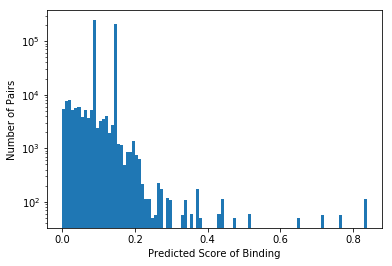

In [67]:
plt.hist(Y, bins = 100, log = True)
plt.xlabel('Predicted Score of Binding')
plt.ylabel('Number of Pairs')

In [73]:
len(np.where(Y > 0.8)[0])

115

In [72]:
np.where(Y > 0.8)

(array([251725, 254187, 256725, 259187, 261725, 264187, 266725, 269187,
        271725, 274187, 276725, 279187, 281725, 284225, 286687, 289975,
        292437, 294975, 297437, 299975, 302437, 304975, 307437, 309975,
        312437, 314975, 317437, 319975, 322437, 324975, 327437, 329975,
        332437, 334975, 337437, 339975, 342437, 344975, 347437, 349975,
        352437, 354975, 357437, 359975, 362437, 364975, 367437, 369975,
        372437, 374975, 377437, 379975, 382437, 384975, 387437, 389975,
        392437, 394975, 397437, 399975, 402437, 404975, 407437, 409975,
        412437, 414975, 417437, 419975, 422437, 424975, 427437, 429975,
        432437, 434975, 437437, 439975, 442437, 444975, 447437, 449975,
        452437, 454975, 457437, 459975, 462437, 464975, 467437, 469975,
        472437, 474975, 477437, 479975, 482437, 484975, 487437, 489975,
        492437, 494975, 497437, 499975, 502437, 504975, 507437, 509975,
        512437, 514975, 517437, 519975, 522437, 524975, 527437, 